In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_da

True

In [2]:
df = pd.read_csv("merged_dataset.csv")  # Change this to your actual file name

<ipython-input-18-427cd64aa034>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


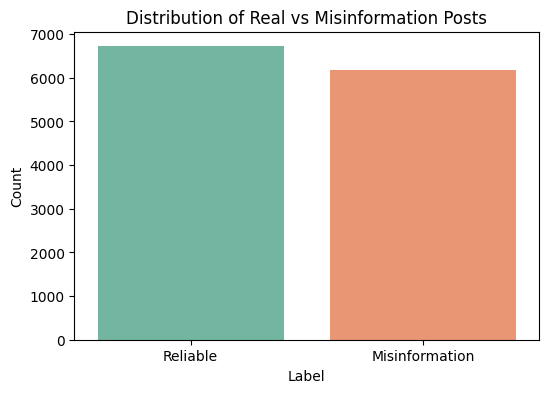

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Real vs Misinformation Posts")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

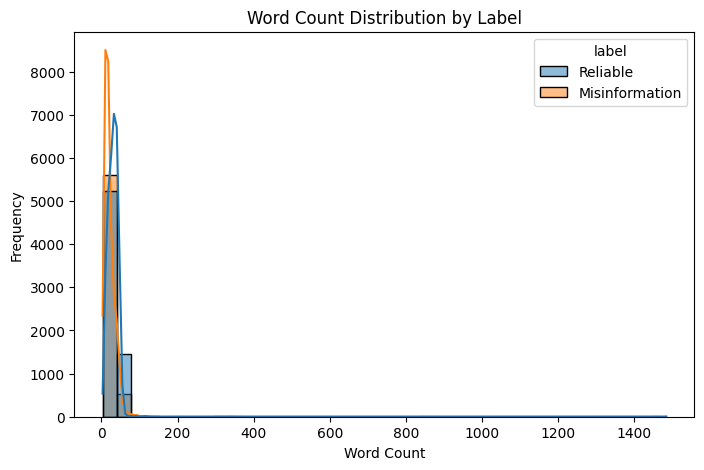

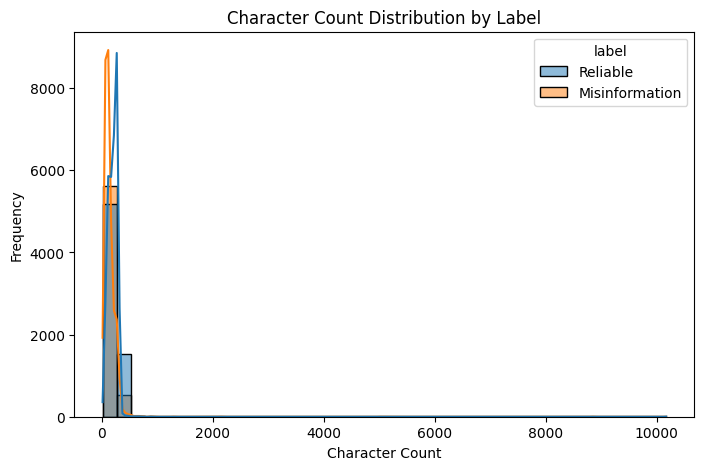

In [19]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['content'].apply(lambda x: len(str(x)))

# Plot Word Count
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='word_count', hue='label', bins=40, kde=True)
plt.title("Word Count Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Plot Char Count
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='char_count', hue='label', bins=40, kde=True)
plt.title("Character Count Distribution by Label")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()


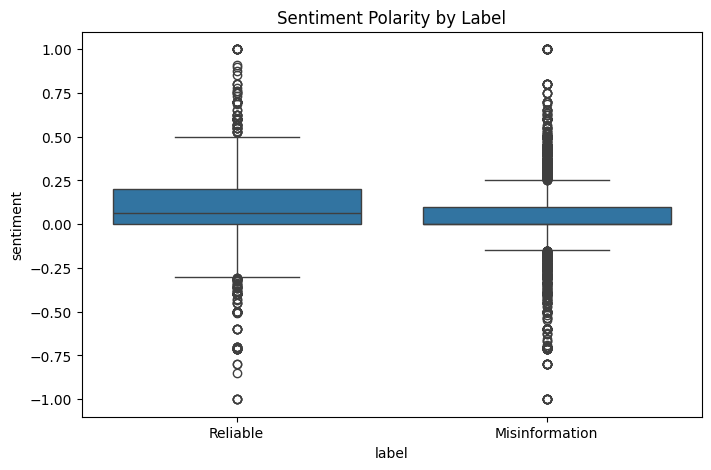

In [20]:
from textblob import TextBlob

df['sentiment'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='sentiment', data=df)
plt.title("Sentiment Polarity by Label")
plt.show()


Center (median): Both distributions are centered around neutral sentiment (0), but Reliable content appears slightly more positive on average.

Spread: Misinformation tends to have a wider range of extreme sentiments (both negative and positive).

Outliers: Many misinformation posts have very negative sentiment (≤ -0.5), which may indicate fear-inducing or emotionally charged language.

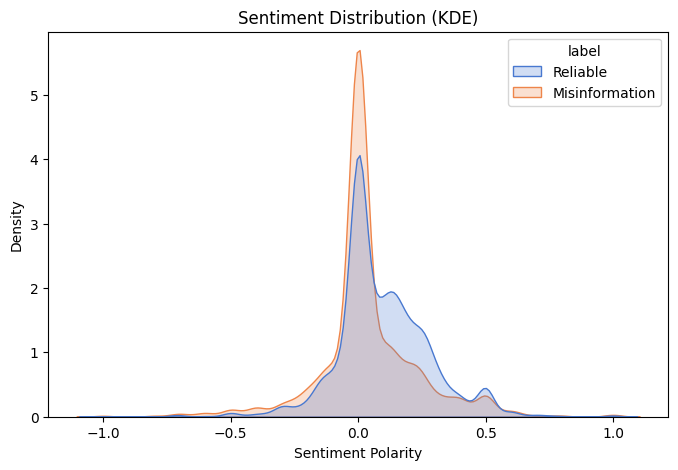

In [22]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='sentiment', hue='label', fill=True, common_norm=False, palette='muted')
plt.title("Sentiment Distribution (KDE)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Density")
plt.show()


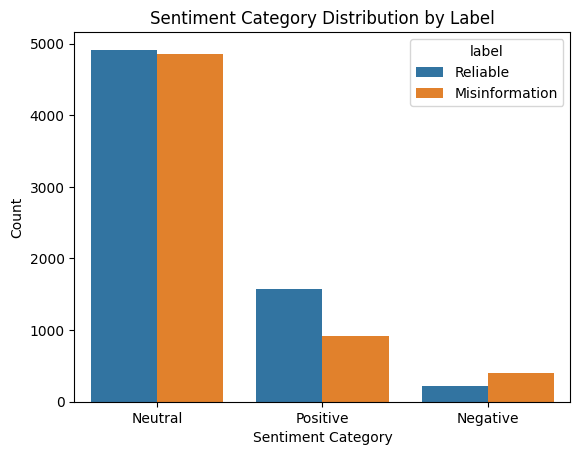

In [23]:
def sentiment_category(score):
    if score < -0.2:
        return 'Negative'
    elif score > 0.2:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment_cat'] = df['sentiment'].apply(sentiment_category)

sns.countplot(x='sentiment_cat', hue='label', data=df)
plt.title("Sentiment Category Distribution by Label")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()
